# Mean Pairwise TracIn(Ideal/CP) of Training Examples on Test-Set

In [9]:
superbatches = 1

[f"[{i}%:{i + 100 // superbatches}%]" for i in range(0, 100, 100 // superbatches)]

['[0%:100%]']

0

I.e., mean influence a given document from the training data had on all examples in a test set.

Requirements:
 - Training dataset: A sample from the (pretraining/finetuning) data 
 - Test dataset: A set of examples for wich training data influence is to be estimated (as a group!)

Use Case:
 - You have multiple sets ([noisy, not noisy, ood, etc] or (verbalized, percentage, no ce) or (math, news, books, child directed)]
 - You want to know the most useful documents from the training data when predicting examples from those sets

Why not per-train-test-instance?
- Theoretically possible but not implemented (would not have made sense for BabyLM)
- Way more expensive to compute across checkpoints

In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
from datasets import load_dataset
import plotting
from util import tokenize_tulu_dataset, get_checkpoints_olmo
import pandas as pd
import swifter

import torch
from transformers import AutoTokenizer

In [2]:

model_name = "allenai/OLMo-2-1124-7B"
dataset_train_name ="yahma/alpaca-cleaned"
dataset_train_split_name = "train"
dataset_test_name = "yahma/alpaca-cleaned"
dataset_test_split_name = "train"


In [3]:
df,_ = plotting.load_data_for_plotting(dataset_train_name, dataset_train_split_name,model_name)

influence_output_dir ./mean_influence/OLMo-2-1124-7B/alpaca-cleaned_train_alpaca-cleaned_train


In [5]:
pd.set_option('display.max_colwidth', None)

In [13]:
df.to_excel(os.path.basename(model_name) + "_" +os.path.basename(dataset_train_name) + ".xlsx")

In [6]:
df.sort_values(by="total", ascending=True)

stage1-step150-tokens1B      total  \
16381                 0.299903   0.299903   
23019                 0.364567   0.364567   
1398                  0.365340   0.365340   
28350                 0.423184   0.423184   
43584                 0.424459   0.424459   
...                        ...        ...   
38076                16.576199  16.576199   
18330                16.628130  16.628130   
12837                16.654097  16.654097   
34058                16.865534  16.865534   
46217                17.215456  17.215456   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [18]:
p = [
    ("allenai/OLMo2-7B-1124", "main", None, "pretrained"),
    ("allenai/OLMo-2-1124-7B-SFT", "main", "allenai/tulu-3-sft-olmo-2-mixture", "+2 epochs tülu 3"), 
    ("allenai/OLMo-2-1124-7B-DPO", "main", "allenai/olmo-2-1124-7b-preference-mix", "+1 epoch olmo-2-1124-7b-preference-mix"), 
    ("allenai/OLMo-2-1124-7B-Instruct", "main", "allenai/RLVR-GSM", "+ PPO (1 Epoch RLVR)")
 ]

In [19]:
counts = [len(load_dataset(dataset_name)["train"])  for _,_,dataset_name, _ in p if dataset_name is not None]

In [20]:
sum(counts)

1325158

Create a synthetic dataset $\subseteq  D_{{olmo_{post}}}$




$\sum_i=0^k$

In [21]:
import argparse
import os

import setproctitle
from dotenv import load_dotenv
load_dotenv()
import wandb

from util import batch 

from functools import partial
from multiprocessing.pool import ThreadPool



import json

from datasets import load_dataset

In [22]:

dataset_train = load_dataset(dataset_train_name)[dataset_train_split_name] 

dataset_test = load_dataset(dataset_test_name)[dataset_test_split_name] 


In [23]:
len(dataset_train)/1000

51.76

In [24]:
num_processes_gradients = 8
for _ in range(num_processes_gradients//4):

    for i in range(0,4):
        #  gpu_queue.put(i)
        print(i)
    

0
1
2
3
0
1
2
3


In [25]:
dataset_train[0]["messages"]

KeyError: 'messages'

In [15]:
(len(dataset_test)/1000)*31.25

29354.5

In [17]:
size_gradient_mb = 31250/1000

In [19]:
disk_space_mb = 5e+6

In [56]:
(160000/4)*0.5/60/60

5.555555555555555

In [57]:
160000/sum(counts)

0.12074031926758923

In [20]:
disk_space_mb / size_gradient_mb

160000.0

In [22]:
len(dataset_test) / (disk_space_mb / size_gradient_mb)

5.8709

In [33]:
(sum(counts) *size_gradient_mb)/disk_space_mb

8.2822375

In [49]:
list(zip(counts, ["SFT", "DPO", "RLSV"], [(float(c)*size_gradient_mb)/1e+6
 for c in counts]))

[(939344, 'SFT', 29.3545),
 (378341, 'DPO', 11.82315625),
 (7473, 'RLSV', 0.23353125)]

In [50]:
sum([(float(c)*size_gradient_mb)/1e+6
 for c in counts])

41.411187500000004

In [46]:
size_gradient_mb

31.25

In [18]:
size_gradient_mb

31.25

In [8]:



# gradient_output_dir_train = os.path.join("./gradients", os.path.basename(model_name), os.path.basename(dataset_train_name), dataset_train_split_name)
# gradient_output_dir_test = os.path.join("./gradients", os.path.basename(model_name), os.path.basename(dataset_test_name), dataset_test_split_name)


# if not os.path.exists("./influence"):
#     os.makedirs("./influence")
    
# influence_output_dir = os.path.join("./influence", os.path.basename(model_name), "_".join([os.path.basename(dataset_train_name), dataset_train_split_name, os.path.basename(dataset_test_name), dataset_test_split_name]))
# if not os.path.exists(influence_output_dir):
#     os.makedirs(influence_output_dir)


# os.environ["TOKENIZERS_PARALLELISM"] = "True"




# import torch


# import logging
# logging.basicConfig(
#                     level=logging.INFO,
#                     format='%(asctime)s - %(levelname)s - %(message)s')




# import util


# import time

# import datasets




# # TODO we only need to know the lenght of the dataset here









# import util


# ##########################################


# import torch 
# import time
# from concurrent.futures import ThreadPoolExecutor



# #########################################
# from multiprocessing import Pool, current_process, Queue
# import time 
# import datetime
# import os
# from pathlib import Path
# import torch
# from itertools import cycle


# import sys

# from transformers import RobertaTokenizerFast

# tokenizer = RobertaTokenizerFast.from_pretrained(model_name, max_len=512)


# from util import get_checkpoints_hub
# checkpoints =  get_checkpoints_hub(model_name)

# from util import DeterministicDataCollatorForLanguageModeling




# import sys

# from multiprocessing import Pool, Manager


# import shutil




# checkpoint = checkpoints[0]
    
# ###############

# chunks_train = [ os.path.join(gradient_output_dir_train, os.path.basename(checkpoint), str(i) + "_" + str(i + 1000)) for i in list(range(0, len(dataset_train), 1000))]

# chunks_test = [ os.path.join(gradient_output_dir_test, os.path.basename(checkpoint), str(i) + "_" + str(i + 1000)) for i in range(0, len(dataset_test), 1000)]


# device = "cpu"

# load_fn = lambda chunk_path: torch.load(chunk_path, weights_only=True, map_location=device).flatten(1)
# chunks_a = None
# with ThreadPoolExecutor(max_workers=50) as executor:
#     chunks_a = list(executor.map(lambda task: (load_fn(task)), chunks_train))
# chunks_b = None
# with ThreadPoolExecutor(max_workers=50) as executor:
#     chunks_b = list(executor.map(lambda task: (load_fn(task)), chunks_test))
# ###############



# c = torch.cat(chunks_a, dim=0)
# del chunks_a
# d = torch.cat(chunks_b, dim=0)
# del chunks_b

# assert c.shape[0] == len(dataset_train)

# simple = torch.matmul(c, d.T)

# simple.shape

In [9]:
def convert_to_float(value):
    if value and isinstance(value, str):
        value = value.replace("tokens", "")
        num = ''.join([char for char in value if char.isdigit()])
        suffix = ''.join([char for char in value if char.isalpha()])
        num = float(num)
        if suffix == 'B':
            num *= 1e9  # Billion
        elif suffix == 'M':
            num *= 1e6  # Million
        elif suffix == 'K':
            num *= 1e3  # Thousand
        return num
    return None


In [4]:
selection = []

In [10]:
checkpoints = pd.DataFrame(get_checkpoints_olmo(model_name=model_name))
checkpoints.columns = ["name"]
checkpoints[['stage', 'ingredient', 'step', 'tokens']] = checkpoints["name"].str.extract(r'(stage\d+)-(ingredient\d+)?-?(step\d+)?-?(tokens\d+\w+)?')
checkpoints.set_index("name")

checkpoints["step"] = pd.to_numeric(checkpoints["step"].str.replace("step",""))
checkpoints["stage"] = pd.to_numeric(checkpoints["stage"].str.replace("stage",""))
checkpoints['tokens'] = checkpoints['tokens'].apply(convert_to_float)

# checkpoints = checkpoints[checkpoints["stage"] == "stage2"]

In [11]:
checkpoints

,name,stage,ingredient,step,tokens
0,main,NaN,NaN,NaN,None


<Axes: xlabel='step'>

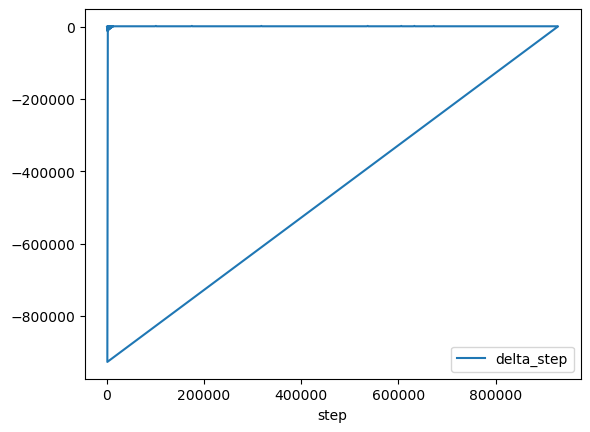

In [7]:
checkpoints['delta_step'] = checkpoints['step'].diff()

checkpoints[['step', 'delta_step']].plot(x='step', y='delta_step', kind='line')


In [8]:
checkpoints['delta_step']

0         NaN
1       450.0
2       100.0
3       150.0
4        50.0
        ...  
960    1000.0
961    1000.0
962    1000.0
963     931.0
964       NaN
Name: delta_step, Length: 965, dtype: float64

In [21]:
checkpoints.tail(50)

,name,stage,ingredient,step,tokens,delta_step
915,stage1-step917000-tokens3847B,1.0,NaN,917000.0,3.847000e+12,1000.0
916,stage1-step918000-tokens3851B,1.0,NaN,918000.0,3.851000e+12,1000.0
917,stage1-step919000-tokens3855B,1.0,NaN,919000.0,3.855000e+12,1000.0
918,stage1-step920000-tokens3859B,1.0,NaN,920000.0,3.859000e+12,1000.0
919,stage1-step921000-tokens3863B,1.0,NaN,921000.0,3.863000e+12,1000.0
920,stage1-step922000-tokens3868B,1.0,NaN,922000.0,3.868000e+12,1000.0
921,stage1-step923000-tokens3872B,1.0,NaN,923000.0,3.872000e+12,1000.0
922,stage1-step924000-tokens3876B,1.0,NaN,924000.0,3.876000e+12,1000.0
923,stage1-step925000-tokens3880B,1.0,NaN,925000.0,3.880000e+12,1000.0
924,stage1-step926000-tokens3884B,1.0,NaN,926000.0,3.884000e+12,1000.0


<Axes: xlabel='tokens'>

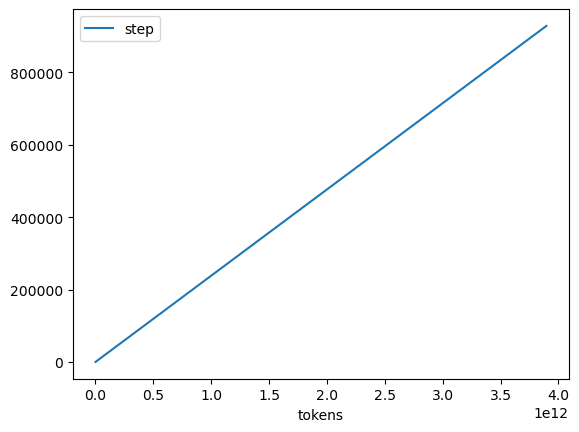

In [26]:
checkpoints[checkpoints["stage"] == 1][["step", "tokens"]].plot(y='step', x='tokens', kind='line')


In [32]:
stage_1 = checkpoints[(checkpoints["stage"] == 1)]

In [36]:
(stage_1["tokens"].max() - stage_1["tokens"].min()) // len(stage_1)

np.float64(4197198275.0)

<Axes: >

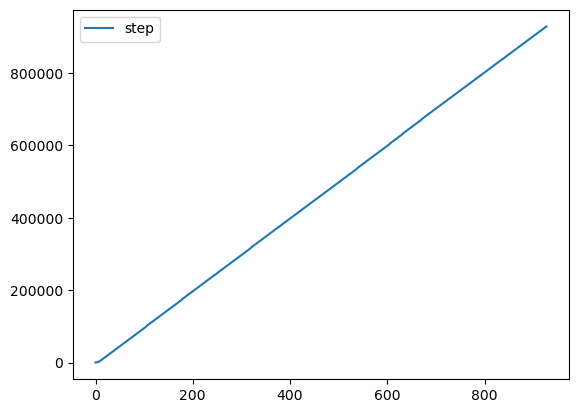

In [25]:
checkpoints[checkpoints["stage"] == 1][["step"]].plot( kind='line')


In [10]:
checkpoints

,name,stage,ingredient,step,tokens,delta_step
0,stage1-step150-tokens1B,1.0,NaN,150.0,1.000000e+09,NaN
1,stage1-step600-tokens3B,1.0,NaN,600.0,3.000000e+09,450.0
2,stage1-step700-tokens3B,1.0,NaN,700.0,3.000000e+09,100.0
3,stage1-step850-tokens4B,1.0,NaN,850.0,4.000000e+09,150.0
4,stage1-step900-tokens4B,1.0,NaN,900.0,4.000000e+09,50.0
...,...,...,...,...,...,...
960,stage2-ingredient3-step9000-tokens38B,2.0,ingredient3,9000.0,3.800000e+10,1000.0
961,stage2-ingredient3-step10000-tokens42B,2.0,ingredient3,10000.0,4.200000e+10,1000.0
962,stage2-ingredient3-step11000-tokens47B,2.0,ingredient3,11000.0,4.700000e+10,1000.0
963,stage2-ingredient3-step11931-tokens50B,2.0,ingredient3,11931.0,5.000000e+10,931.0


In [11]:
import numpy as np



In [12]:
n = 10
checkpoints_ = checkpoints[~checkpoints["ingredient"].isin(["ingredient2", "ingredient3"])].reset_index(drop=True)
checkpoints_.iloc[1::int(np.ceil( len(checkpoints_) / n ))]


,name,stage,ingredient,step,tokens,delta_step
1,stage1-step600-tokens3B,1.0,NaN,600.0,3.000000e+09,450.0
96,stage1-step91000-tokens382B,1.0,NaN,91000.0,3.820000e+11,1000.0
191,stage1-step188000-tokens789B,1.0,NaN,188000.0,7.890000e+11,1000.0
286,stage1-step283000-tokens1187B,1.0,NaN,283000.0,1.187000e+12,1000.0
381,stage1-step379000-tokens1590B,1.0,NaN,379000.0,1.590000e+12,1000.0
476,stage1-step474000-tokens1989B,1.0,NaN,474000.0,1.989000e+12,1000.0
571,stage1-step570000-tokens2391B,1.0,NaN,570000.0,2.391000e+12,1000.0
666,stage1-step667000-tokens2798B,1.0,NaN,667000.0,2.798000e+12,1000.0
761,stage1-step763000-tokens3201B,1.0,NaN,763000.0,3.201000e+12,1000.0
856,stage1-step858000-tokens3599B,1.0,NaN,858000.0,3.599000e+12,1000.0


In [13]:
checkpoints_.iloc[::int(np.ceil( len(checkpoints_) / n ))]


,name,stage,ingredient,step,tokens,delta_step
0,stage1-step150-tokens1B,1.0,NaN,150.0,1.000000e+09,NaN
95,stage1-step90000-tokens378B,1.0,NaN,90000.0,3.780000e+11,1000.0
190,stage1-step187000-tokens785B,1.0,NaN,187000.0,7.850000e+11,1000.0
285,stage1-step282000-tokens1183B,1.0,NaN,282000.0,1.183000e+12,1000.0
380,stage1-step378000-tokens1586B,1.0,NaN,378000.0,1.586000e+12,1000.0
475,stage1-step473000-tokens1984B,1.0,NaN,473000.0,1.984000e+12,1000.0
570,stage1-step569000-tokens2387B,1.0,NaN,569000.0,2.387000e+12,1000.0
665,stage1-step666000-tokens2794B,1.0,NaN,666000.0,2.794000e+12,1000.0
760,stage1-step762000-tokens3197B,1.0,NaN,762000.0,3.197000e+12,1000.0
855,stage1-step857000-tokens3595B,1.0,NaN,857000.0,3.595000e+12,1000.0


In [14]:
checkpoints_["tokens"].describe()

count    9.400000e+02
mean     1.914850e+12
std      1.147022e+12
min      1.000000e+09
25%      9.220000e+11
50%      1.911000e+12
75%      2.912250e+12
max      3.896000e+12
Name: tokens, dtype: float64

In [6]:
# checkpoints

In [7]:
# checkpoints

In [26]:
# # dataset_train_name = "allenai/tulu-v2-sft-mixture"
# # dataset_train_split_name = "train[:1%]"

# # dataset_test_name = "allenai/tulu-v2-sft-mixture"
# # dataset_test_split_name="train[5%:6%]"

# model_name = "allenai/OLMo-2-1124-7B"

# dataset = tokenize_tulu_dataset("allenai/tulu-v2-sft-mixture", "train[:1%]")
influence_output_dir = os.path.join("./mean_influence", os.path.basename(model_name), "_".join([os.path.basename(dataset_train_name), dataset_train_split_name, os.path.basename(dataset_test_name), dataset_test_split_name]))


In [27]:
influence_output_dir

'./mean_influence/OLMo-2-1124-7B/alpaca-cleaned_train_alpaca-cleaned_train'

In [28]:
os.listdir(influence_output_dir)

['stage1-step150-tokens1B']

In [29]:
# dataset_train = tokenize_tulu_dataset(dataset_train_name, dataset_train_split_name)
# dataset_test = tokenize_tulu_dataset(dataset_train_name, dataset_test_split_name)

In [30]:
tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-2-1124-7B")

In [31]:
# {(result_checkpoint): torch.load(os.path.join(influence_output_dir,result_checkpoint),weights_only=True,map_location="cpu").float().numpy() for result_checkpoint in os.listdir(influence_output_dir)}

In [32]:
data = {(result_checkpoint): torch.load(os.path.join(influence_output_dir,result_checkpoint),weights_only=True,map_location="cpu").to(dtype=torch.float16).numpy() for result_checkpoint in os.listdir(influence_output_dir)}

In [34]:
d = data["stage1-step150-tokens1B"]

In [44]:
d

array([[2.848, 5.7  , 1.803, ..., 5.008, 5.07 , 4.453]], dtype=float16)

In [35]:
from sklearn.preprocessing import minmax_scale #  TODO choose

import numpy as np

In [36]:
e_x = np.exp(d - np.max(d))
d_sm = e_x / e_x.sum(axis=0)

In [37]:
d_normalized = minmax_scale(d, axis=0)

In [38]:
d_normalized.shape

(1, 51760)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: ylabel='Count'>

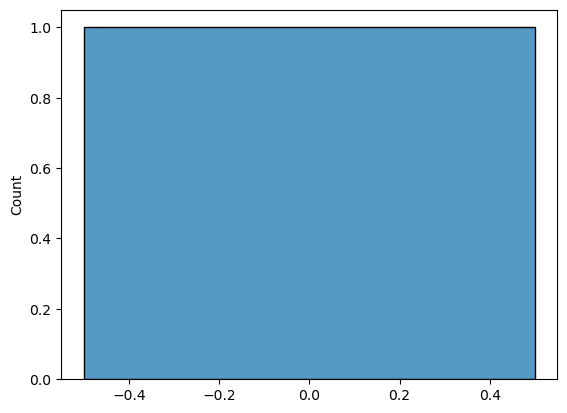

In [40]:
m = d_normalized.mean(axis=1)

sns.histplot(m)

In [41]:
d_sm

array([[1., 1., 1., ..., 1., 1., 1.]], dtype=float16)

In [29]:
m_sm.min()

np.float16(0.3677)

In [23]:
trhzdfcx

NameError: name 'trhzdfcx' is not defined

In [ ]:
z_scores = (data["checkpoint-6174"] - data["checkpoint-6174"].mean())/data["checkpoint-6174"].std()

In [ ]:
z_scores

In [15]:
# a = simple.float().numpy()
# b = data["checkpoint-6174"].to_numpy()#[:2000,:]
# (np.abs(a-b)).mean()
# np.allclose(a,b, rtol=10e-3)

In [16]:
# df = pd.DataFrame(torch.load(os.path.join(influence_output_dir,os.listdir(influence_output_dir)[0]),weights_only=True,map_location="cpu"))

In [17]:
# df.to_parquet("a")

In [18]:
# ddf.head()

In [19]:
# dff

In [20]:
# ddf.compute()

In [21]:
# ddf

In [22]:
# ddf.head()

In [ ]:
gtsr4qartgsf

In [ ]:
import pandas as pd
import swifter

import numpy as np


df = pd.DataFrame(np.random.randn(100, 3))

df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [ ]:
äkrhipz98ur09iekovfmlkgnht9rifko

In [36]:
import numpy as np

In [ ]:
pd.DataFrame(data)

In [ ]:
df = pd.DataFrame({(result_checkpoint): torch.load(os.path.join(influence_output_dir,result_checkpoint),weights_only=True,map_location="cpu").float().numpy() for result_checkpoint in os.listdir(influence_output_dir)})
df.sort_index(axis=1)
print(len(df))

KeyError: 0

In [ ]:
torch.load(os.path.join(influence_output_dir,result_checkpoint),weights_only=True,map_location="cpu").float().numpy()

In [ ]:
df

In [ ]:
df = pd.DataFrame({(result_checkpoint): torch.load(os.path.join(influence_output_dir,result_checkpoint),weights_only=True,map_location="cpu").numpy().flatten() for result_checkpoint in os.listdir(influence_output_dir)})
df.sort_index(axis=1)
print(len(df))

df = df.reindex(sorted(df.columns, reverse=False), axis=1)
influence_cols = df.columns
df["total"] = df.sum(axis=1)
df["text"] = dataset_train.to_pandas()["input_ids"].apply(lambda x: tokenizer.decode(x, skip_special_tokens=True))
# df["document_lenght"] = df["text"].str.split().str.len()

In [ ]:
pd.set_option('display.max_colwidth', 1000)
df.sort_values(by="total", ascending=False)

In [ ]:
len(dataset_train)

In [ ]:
dataset[0]["input_ids"]

In [ ]:
dataset[0]

In [16]:
from pathlib import Path
import numpy as np





In [ ]:
checkpoint_names

In [6]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch




In [ ]:

message = ["Language modeling is "]

oldmos = []
for i in [1,100,500,900]:
    
    olmo = AutoModelForCausalLM.from_pretrained("allenai/OLMo-2-1124-7B", revision=checkpoint_names[i])
    inputs = tokenizer(message, return_tensors='pt', return_token_type_ids=False)
    # optional verifying cuda
    inputs = {k: v.to('cuda') for k,v in inputs.items()}
    olmo = olmo.to('cuda')
    oldmos.append(olmo)
    response = olmo.generate(**inputs, max_new_tokens=100, do_sample=True, top_k=50, top_p=0.95)
    print(tokenizer.batch_decode(response, skip_special_tokens=True)[0])

In [ ]:

checkpoints_stage_2

In [ ]:
checkpoints_stage1

In [1]:
import torch

In [5]:
torch.load("/data/sedovaa20dm/tracin/influence/OLMo-2-1124-7B/tulu-3-sft-olmo-2-mixture/train_1_train_1/main").mean(axis=1).shape

/tmp/ipykernel_1414618/511616238.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load("/data/sedovaa20dm/tracin/influence/OLMo-2-1124-7B/tulu-3-sft-olmo-2-mixture/

torch.Size([9390])